### Codio Activity 13.2: Introduction to Logistic Regression with Scikit-Learn

**Expected Time = 60 minutes** 

**Total Points = 60** 

This activity introduces the `LogisticRegression` estimator from scikitlearn.  After fitting the model on a single feature for binary classes, you will plot the sigmoid curve to represent the learned model in terms of probabilities.  Finally, you will evaluate the model in terms of accuracy, precision, and recall.  

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)
- [Problem 5](#-Problem-5)
- [Problem 6](#-Problem-6)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split

from scipy.optimize import minimize

In [2]:
penguins = sns.load_dataset('penguins').dropna()
penguins = penguins.loc[(penguins['species'] == 'Adelie') | (penguins['species'] == 'Gentoo')]
X = penguins.drop('species', axis = 1)[['flipper_length_mm']]
y = np.where(penguins.species == 'Adelie', 0, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

Text(0.5, 1.0, 'Flipper Length by Species')

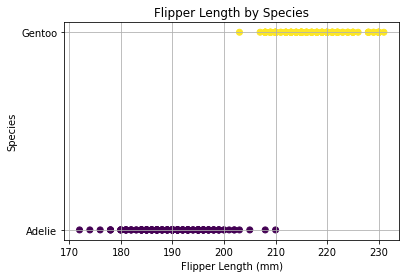

In [3]:
plt.scatter(X, penguins.species, c = y)
plt.grid()
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Species')
plt.title('Flipper Length by Species')

[Back to top](#-Index)

### Problem 1

#### Building a Logistic Model

**10 Points**

The `LogisticRegression` estimator works in the same way as our earlier examples.  Below, instantiate and fit the estimator as `log_reg` on the training data.  Note that you need not make the target feature numeric here, all the scikitlearn classifiers will handle string categories as a target.  

In [4]:
### GRADED

logreg = ''

# YOUR CODE HERE
logreg = LogisticRegression().fit(X_train, y_train)

# Answer check
print(logreg)

LogisticRegression()


[Back to top](#-Index)

### Problem 2

#### Examining the coefficients

**10 Points**

Similar to the `LinearRegression` estimator, your `log_reg` estimator now has a `.coef_` and `.intercept_` attribute.  Further, you are still interested in a linear combination of the input with these coefficients and intercept terms.  Below, complete the function `linear_predictions` that takes in a fit regression model, and a feature array.  It will return the predictions using the model $$\text{odds} = \text{intercept} + \text{coef}*X$$ 

In [5]:
### GRADED

def linear_predictions(model, X):
    """
    This function takes in a fit linear model
    and returns the models intercept + coefs*X
    
    Arguments
    ---------
    model: scikitlearn.linear_model 
           Linear Model estimator -- Linear or Logistic Regression
           that is already fit
    X: pd.DataFrame (N,1)
        1 Feature DataFrame with 1 feature
        
    Returns
    --------
    odds: pd.DataFrame
         Array of odds based on input X
    """
    return None

# YOUR CODE HERE
def linear_predictions(model, X):
    return model.intercept_ + model.coef_*X

# Answer check
predictions = linear_predictions(logreg, X_train)
np.round(predictions.head())

,flipper_length_mm
92,-17.0
340,7.0
43,-8.0
220,4.0
253,19.0


[Back to top](#-Index)

### Problem 3

#### Examining the log odds

**10 Points**

The predictions above are the log odds for the positive class.  In order to interpret these as probabilities, we need to return to the original sigmoid form:

$$\sigma(x) = \frac{1}{1 + e^{-(ax + b)}}$$

Complete the function `sigma` below that takes in an array of log odds (like `predictions`) and returns the sigmoid function.  The results should look like the image below when plotted.

<center>
    <img src = 'images/sigmoid.png' />
</center>

In [6]:
### GRADED

def sigma(predictions):
    """
    This function takes in predictions as log odds and
    returns their probability of being the positive class
    in a binary classification setting.
    
    Arguments
    ---------
    predictions; np.array
            array of log odds prediction values for each data
            point
    Returns
    ---------
    probabilities: np.array
            array of probabilities for positive class
    """
    return None

# YOUR CODE HERE
def sigma(predictions):
    return 1/(1 + np.exp(-predictions))

# Answer check
probs = sigma(predictions)
print(probs)

     flipper_length_mm
92        3.984942e-08
340       9.991126e-01
43        2.706259e-04
220       9.784955e-01
253       1.000000e+00
..                 ...
25        1.982262e-07
263       9.996019e-01
77        1.786704e-08
112       2.439876e-05
108       1.610438e-09

[198 rows x 1 columns]


[Back to top](#-Index)

### Problem 4

#### Making Class Predictions

**10 Points**

Now, use the probabilities obtained from the sigmoid function to make predictions.  Specifically, if a probability is greater than or equal to 0.5, assign this to the positive class 1, otherwise assign class 0.  Assign your solution as a numpy array to `class_predictions` below.

In [7]:
### GRADED

class_predictions = ''

# YOUR CODE HERE
class_predictions = np.where(sigma(predictions) >= 0.5, 1, 0)

# Answer check
print(np.unique(class_predictions, return_counts=True)[1])

[105  93]


[Back to top](#-Index)

### Problem 5

#### Using the `predict_proba` method

**10 Points**

Luckily, you needn't go through this process each time having fit a Logistic model to determine these probabilities.  A fit `LogisticRegression` estimator has a `.predict_proba` method similar to that of the `KNeighborsClassifier` from last module.  This returns the probabilities for each class as a 2D numpy array.  Below, assign the probabilities for the positive class on the test data as a 1D numpy array -- (67,) -- to `positive_probs` below using the `predict_proba` method of the `logreg` object. 


(67,)


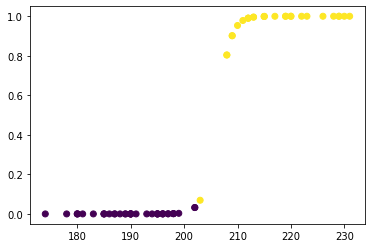

In [8]:
### GRADED

positive_probs = ''

# YOUR CODE HERE
positive_probs = logreg.predict_proba(X_test)[:, 1]

# Answer check
print(positive_probs.shape) #(67,)
plt.scatter(X_test, positive_probs, c = y_test)

[Back to top](#-Index)

### Problem 6

#### Scoring the Classifier

**10 Points**

Again, you may be interested in different metrics for your classifier.  Below, use the `logreg` object to make predictions and evaluate them against `y_test` for accuracy, precision, and recall.  Assign as floats to the appropriate variables below.

In [9]:
### GRADED
preds = ''
accuracy = ''
precision = ''
recall = ''

# YOUR CODE HERE
preds = logreg.predict(X_test)
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)

# Answer check
print(f'Accuracy: {accuracy: .2f}\nPrecision: {precision: .2f}\nRecall: {recall: .2f}')

Accuracy:  0.99
Precision:  1.00
Recall:  0.96


From this example it seems you have a powerful classifier.  In the following activity, you will explore more about exactly where these coefficients come from and how they are determined in general.  